# Ecuaciones maestras y cadenas de Markov

## Parte 1: Proceso de Poisson

El proceso de Poisson es un proceso en el cual suceden eventos de forma estocástica, pero con un ritmo constante $\lambda$. Un ejemplo de esto es el número de fotones medidos por un detector en un determinado tiempo, o el número de decaimientos de una muestra radiactiva. También sirve para modelar sistemas logísticos como el número de llamadas que entran a un "call center".
1. Realiza una simulación del proceso de Poisson. Supón que el ritmo de ocurrencia de los eventos es $\lambda=3$ eventos/s, y simula unos 100 segundos.
    - Empieza por definir una variable $n(t)$ que representará el número de eventos que han sucedido en el tiempo $t$.
    - Inicialmente, $n(0) = 0$.
    - Divide el tiempo $t$ en pequeños intervalos $\Delta t$, y supón que en cada intervalo, un evento sucede con una probabilidad $p<1$ , y que por otro lado, tiene una probabilidad $1-p$ de no ocurrir. ¿Cómo puedes relacionar el valor de esta probabilidad $p$ con la frecuencia promedio con la que ocurren los eventos, $\lambda$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt


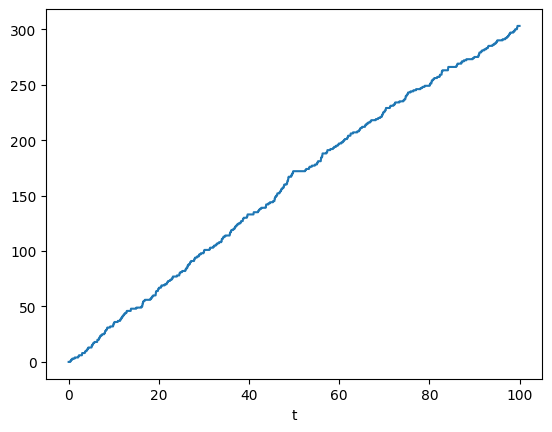

In [2]:
# Proceso de Poisson

lambda_ = 3
dt = 0.02
tf = 100
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)

n_ = np.zeros(iterations)

for i in range(iterations-1):
    # Evento ocurre con probabilidad p, probabilidad p-1 de no ocurrir
    # Relación con lambda: lambda * deltat = p
    p = lambda_ * dt
    event = int(p > np.random.rand())
    n_[i+1] = n_[i] + event

plt.plot(t_, n_)
plt.xlabel("t")
plt.show()


2. Corre la simulación muchas veces (unas 10,000 es un buen número), y haz una gráfica del histograma de $n(t)$ cuando $t=[0, 25, 50, 75, 100]$ segundos. 

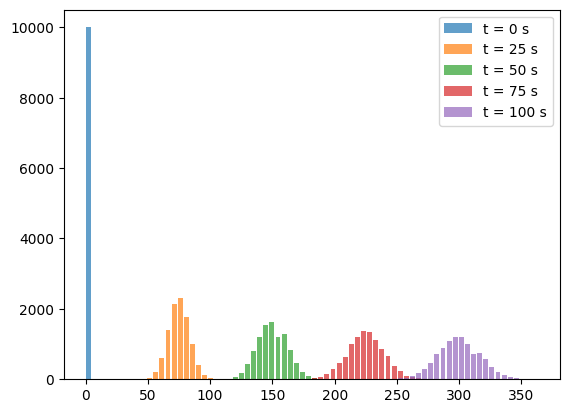

In [3]:
# Proceso de Poisson muchas veces

lambda_ = 3
dt = 0.02
tf = 101
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)
shots = 10000 # Número de veces que se hace la simulación

n_ = np.zeros((iterations, shots))

for i in range(iterations-1):
    # Evento ocurre con probabilidad p, probabilidad p-1 de no ocurrir
    # Relación con lambda: lambda * deltat = p
    p = lambda_ * dt
    event = np.int64(p > np.random.rand(shots))
    n_[i+1, :] = n_[i, :] + event


fig = plt.figure()
ax = fig.add_subplot()

t_i = np.array([0, 25, 50, 75, 100])
idx = np.int64(np.floor(t_i / dt))

bins = np.linspace(0, np.max(n_[-1]), 75)

for i in range(len(t_i)):
    ax.hist(n_[idx[i], :], bins=bins, rwidth=0.8, histtype="bar", alpha=0.7, label=f"t = {t_i[i]} s")

plt.legend()
plt.show()

3. Grafica el valor promedio y la varianza que obtienes de las simulaciones.

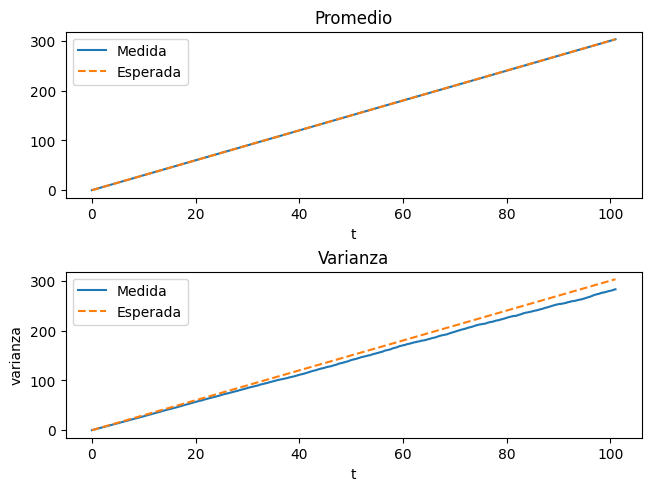

In [4]:
# Promedio y varianza

avg_ = np.mean(n_, axis=1)
var_ = np.var(n_, axis=1)
avg_analytic = lambda_ * t_
var_analytic = lambda_ * t_

fig, axs = plt.subplots(2, 1, layout="constrained")

axs[0].plot(t_, avg_, label="Medida")
axs[0].plot(t_, avg_analytic, "--", label="Esperada")
axs[0].set_xlabel("t")
axs[0].set_title("Promedio")
axs[0].legend()

axs[1].plot(t_, var_, label="Medida")
axs[1].plot(t_, var_analytic, "--", label="Esperada")
axs[1].set_xlabel("t")
axs[1].set_ylabel("varianza")
axs[1].set_title("Varianza")
axs[1].legend()

plt.show()


4. Encuentra una expresión analítica para el valor promedio y la varianza , y compara estos con los obtenidos de la simulación. 

## Parte 2: Proceso de nacimiento y muerte
El proceso definido antes se puede extender si suponemos que en lugar de solo tener eventos que suceden, tenemos la apariencia y desaparición de alguna cosa. Esto podría ser análogo a una población en la que individuos nacen y mueren a ritmos constantes. 
En este caso, podemos definir una variable de estado $n(t)$, que representa el número de individuos en la población. Cuando un individuo nace, a $n$ se le suma 1, y cuando uno muere, a $n$ se le resta 1. 
1. Adapta el algoritmo que programaste en la Parte 1 para programar un proceso de nacimiento y muerte con un ritmo de nacimiento $B=3$ individuos por segundo y un ritmo de muerte $D=1$ individuo por segundo. 

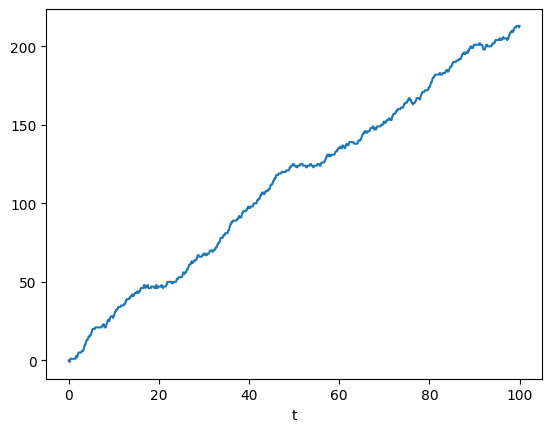

In [5]:
# Proceso de Poisson - vida y muerte

B = 3
D = 1
dt = 0.1
tf = 100
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)

n_ = np.zeros(iterations)

for i in range(iterations-1):
    pB = B * dt
    pD = D * dt
    nacimientos = int(pB > np.random.rand())
    muertes = int(pD > np.random.rand())
    n_[i+1] = n_[i] + nacimientos - muertes

plt.plot(t_, n_)
plt.xlabel("t")
plt.show()

2. Obtén muchas realizaciones del proceso y haz una gráfica del histograma de $n(t)$ cuando $t=[0, 25, 50, 75, 100]$ segundos. 

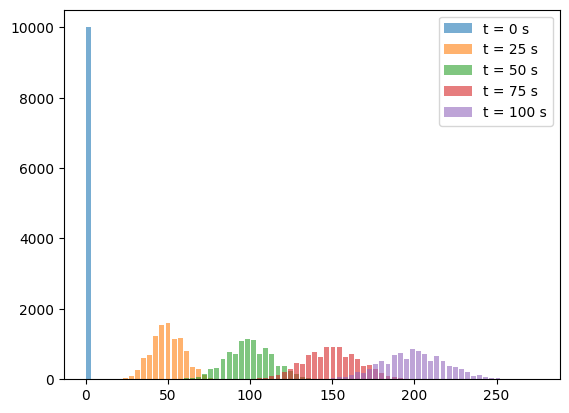

In [6]:
# Proceso de Poisson muchas veces - vida y muerte

B = 3
D = 1
dt = 0.02
tf = 101
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)
shots = 10000 # Número de veces que se hace la simulación

n_ = np.zeros((iterations, shots))

for i in range(iterations-1):
    pB = B * dt
    pD = D * dt
    nacimientos = np.int64(pB > np.random.rand(shots))
    muertes = np.int64(pD > np.random.rand(shots))
    n_[i+1, :] = n_[i, :] + nacimientos - muertes

fig = plt.figure()
ax = fig.add_subplot()

t_i = np.array([0, 25, 50, 75, 100])
idx = np.int64(np.floor(t_i / dt))

bins = np.linspace(0, np.max(n_[-1]), 75)

for i in range(len(t_i)):
    ax.hist(n_[idx[i], :], bins=bins, rwidth=0.8, histtype="bar", alpha=0.6, label=f"t = {t_i[i]} s")

plt.legend()
plt.show()

3. Grafica el valor promedio y la varianza que obtienes de las simulaciones.

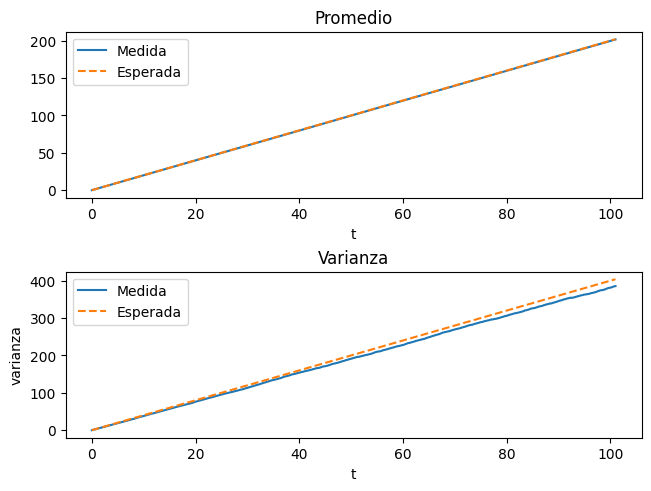

In [7]:
# Promedio y varianza

avg_ = np.mean(n_, axis=1)
var_ = np.var(n_, axis=1)
avg_analytic = (B - D) * t_
var_analytic = (B + D) * t_

fig, axs = plt.subplots(2, 1, layout="constrained")

axs[0].plot(t_, avg_, label="Medida")
axs[0].plot(t_, avg_analytic, "--", label="Esperada")
axs[0].set_xlabel("t")
axs[0].set_title("Promedio")
axs[0].legend()

axs[1].plot(t_, var_, label="Medida")
axs[1].plot(t_, var_analytic, "--", label="Esperada")
axs[1].set_xlabel("t")
axs[1].set_ylabel("varianza")
axs[1].set_title("Varianza")
axs[1].legend()

plt.show()

4. Encuentra una expresión analítica para el valor promedio y la varianza , y compara estos con los obtenidos de la simulación.

## Parte 3: Modelo SIR
Una idea similar se puede utilizar para modelar la propagación de epidemias. Supongamos que tenemos una población, cuyos individuos pueden clasificarse como Susceptible, Infectada o Recuperada (S, I, R). Existen dos posibles transiciones, $S \rightarrow I$ y $I \rightarrow R$. Sin embargo, en este caso el ritmo con que ocurre la primera transición depende de el número de infectados multiplicado por un coeficiente , mientras que el ritmo con que ocurre la segunda transición está dado por $\gamma$. 
1. Realiza una simulación en la que defines tres variables: el número de infectados, el número de susceptibles y el número de recuperados. En cada paso de la simulación existen dos procesos aleatorios: el primero consiste en que un susceptible se infecte, el segundo es que un infectado se recupere. ¿Cuál es el ritmo de cada uno de estos procesos aleatorios?

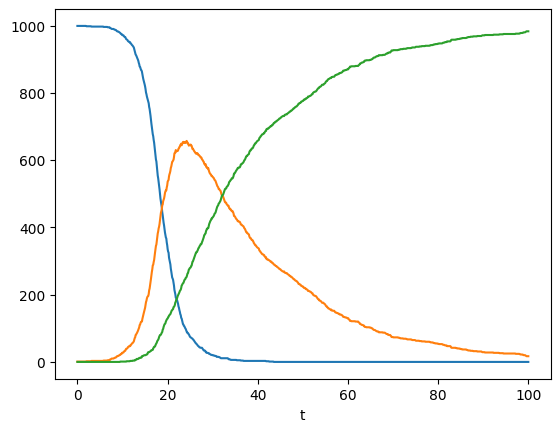

In [8]:
# Modelo SIR

# Proceso S-->I depende del número de infectados multiplicado por coeficiente
beta = 0.0005
# Proceso I-->R está dado por gamma
gamma = 0.05
dt = 0.1
tf = 100
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)

# Clasificación de Individuos
S = np.zeros(iterations)
I = np.zeros(iterations)
R = np.zeros(iterations)

population = 1000
I[0] = 1
S[0] = population - I[0]

for i in range(iterations-1):
    # Ritmo de procesos aleatorios: La probabilidad es proporcional al dt y al coeficiente (y #I para pI)
    pI = I[i]*beta * dt
    pR = gamma * dt
    # Esta probabilidad aplica para cada individuo del respectivo grupo
    infectados = np.sum(np.int64(pI > np.random.rand(int(S[i]))))
    recuperados = np.sum(np.int64(pR > np.random.rand(int(I[i]))))
    S[i+1] = S[i] - infectados
    I[i+1] = I[i] + infectados - recuperados
    R[i+1] = R[i] + recuperados

plt.plot(t_, S)
plt.plot(t_, I)
plt.plot(t_, R)
plt.xlabel("t")
plt.show()

2. Corre la simulación muchas veces y grafica la población de cada categoría vs el tiempo.

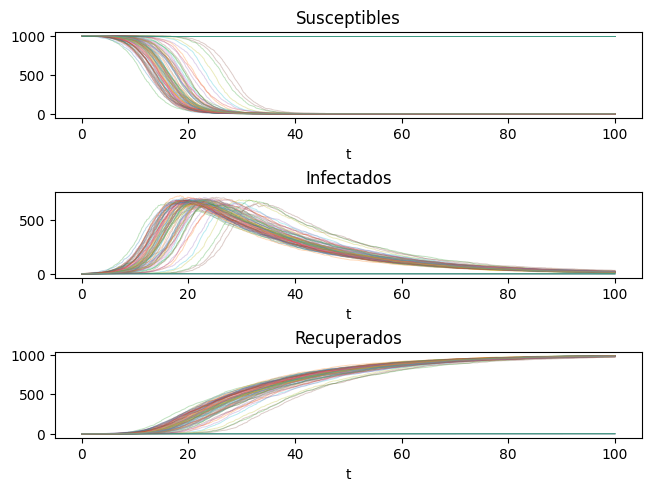

In [9]:
# Modelo SIR muchas veces

# Proceso S-->I depende del número de infectados multiplicado por coeficiente
beta = 0.0005
# Proceso I-->R está dado por gamma
gamma = 0.05
dt = 0.1
tf = 100
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)
shots = 100

# Clasificación de Individuos
S = np.zeros((iterations, shots))
I = np.zeros((iterations, shots))
R = np.zeros((iterations, shots))

population = 1000
I[0, :] = 1
S[0, :] = population - I[0]

for shot in range(shots):
    for i in range(iterations-1):
        # Ritmo de procesos aleatorios: La probabilidad es proporcional al dt y al coeficiente (y #I para pI)
        pI = I[i, shot]*beta * dt
        pR = gamma * dt
        # Esta probabilidad aplica para cada individuo del respectivo grupo
        infectados = np.sum(np.int64(pI > np.random.rand(int(S[i, shot]))))
        recuperados = np.sum(np.int64(pR > np.random.rand(int(I[i, shot]))))
        S[i+1, shot] = S[i, shot] - infectados
        I[i+1, shot] = I[i, shot] + infectados - recuperados
        R[i+1, shot] = R[i, shot] + recuperados


fig, axs = plt.subplots(3, 1, layout="constrained")

for i in range(shots):
    axs[0].plot(t_, S[:, i], alpha=0.3, linewidth=0.7)

axs[0].set_title("Susceptibles")
axs[0].set_xlabel("t")

for i in range(shots):
    axs[1].plot(t_, I[:, i], alpha=0.3, linewidth=0.7)

axs[1].set_title("Infectados")
axs[1].set_xlabel("t")

for i in range(shots):
    axs[2].plot(t_, R[:, i], alpha=0.3, linewidth=0.7)

axs[2].set_title("Recuperados")
axs[2].set_xlabel("t")

plt.show()


3. Encuentra el valor promedio de la población en cada categoría, y la varianza.

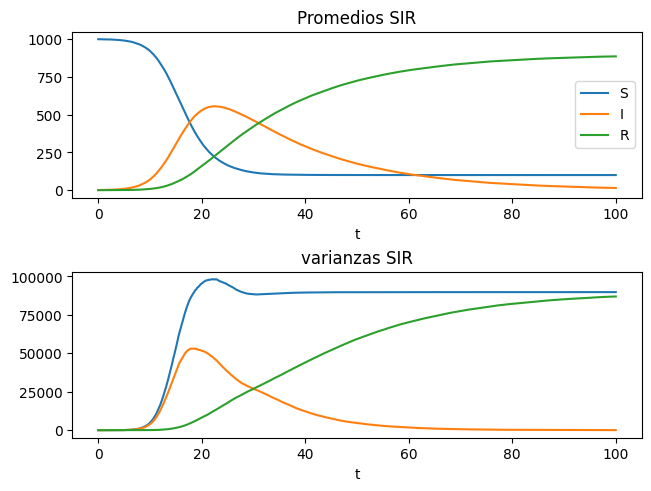

In [10]:
# Promdedio y varianza

avg_S = np.mean(S, axis=1)
var_S = np.var(S, axis=1)

avg_I = np.mean(I, axis=1)
var_I = np.var(I, axis=1)

avg_R = np.mean(R, axis=1)
var_R = np.var(R, axis=1)

fig, axs = plt.subplots(2, 1, layout="constrained")

axs[0].plot(t_, avg_S, label="S")
axs[0].plot(t_, avg_I, label="I")
axs[0].plot(t_, avg_R, label="R")
axs[0].set_xlabel("t") 
axs[0].set_title("Promedios SIR")
axs[0].legend()

axs[1].plot(t_, var_S, label="S")
axs[1].plot(t_, var_I, label="I")
axs[1].plot(t_, var_R, label="R")
axs[1].set_xlabel("t")
axs[1].set_title("varianzas SIR")

plt.show()

4. Escriba la ecuación maestra para la probabilidad conjunta de tener $s$, $i$, $r$ personas en cada categoría: $P(s, i, r)$